In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
df=pd.read_excel('/content/drive/MyDrive/Clickbait/Final_dataset.xlsx')
df

,title,views,like,dislike,target,VL,VD,LD
0,চাকরি করার পূর্ব শর্ত ! Xiaomi Mijia SOOCAS S3...,11755,311,3.11,non-clickbait,37.797428,3779.742765,100.000000
1,LEMFO ELF2 PPG + ECG Smart Watch A to Z review...,24573,205,2.05,non-clickbait,119.868293,11986.829268,100.000000
2,ভালো হবে ! Bass ! Bass ! KZ BTE APTX 1BA+1DD H...,9352,259,2.59,non-clickbait,36.108108,3610.810811,100.000000
3,কম দামের মধ্যে সুন্দর ! Y6 Pro Smart Watch । T...,10131,212,2.12,non-clickbait,47.787736,4778.773585,100.000000
4,PUBG HEAD PHONE - TRN V90 Earphones Full Revie...,14875,889,8.89,non-clickbait,16.732283,1673.228346,100.000000
...,...,...,...,...,...,...,...,...
3106,শাকিব ও সালমান নিয়ে যা বলেন ।দেলোয়ার জাহান ঝ...,6000,367,154.00,clickbait,47.244094,100.000000,2.116667
3107,শাবানা মান্না । ওদের মত শিল্পী তৈয়রী হচ্ছে না...,38000,484,139.00,clickbait,119.122257,306.451613,2.572581
3108,নায়িকা না হয়ে । এশিয়া মহা দেশের এক নাব্বার ...,980,330,60.00,clickbait,2.116631,6.490066,3.066225
3109,"মান্না,কাঞ্জন ওনারা কি ভাবে অভিনয় করতেন । আর ...",137000,110,162.00,clickbait,646.226415,931.972789,1.442177


In [ ]:
df.isnull().sum()

title      103
views       32
like         0
dislike     33
target       4
VL           1
VD          33
LD          33
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
print(df.describe())
print(df.shape)
print(df.info())

                like       dislike             VL            VD            LD
count    2999.000000   2999.000000    2999.000000  2.999000e+03   2999.000000
mean    11122.702901   3007.202061    1822.406966  1.920391e+04    137.596881
std     31265.835212  12879.811574   28497.943308  4.322613e+05    435.808469
min         1.000000      0.550000       0.010101  5.000000e-02      0.001019
25%       161.500000      9.000000       4.367922  6.221630e+01      1.496310
50%       557.000000     71.000000      33.913580  5.260900e+02     11.256410
75%     10500.000000    382.000000      92.918814  1.802273e+03    100.000000
max    891000.000000  98111.000000  821428.571429  1.900000e+07  13000.000000
(2999, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 3110
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    2999 non-null   object 
 1   views    2999 non-null   object 
 2   like     2999 non-null   

## Feature Scaling

In [ ]:
scaled_df=pd.concat([df['like'], df['dislike'], df['VL'],df['VD'],df['LD'], ], axis=1)
scaled_df.head()

,like,dislike,VL,VD,LD
0,311,3.11,37.797428,3779.742765,100.0
1,205,2.05,119.868293,11986.829268,100.0
2,259,2.59,36.108108,3610.810811,100.0
3,212,2.12,47.787736,4778.773585,100.0
4,889,8.89,16.732283,1673.228346,100.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df=scaler.fit_transform(scaled_df)
scaled_df

array([[3.47924072e-04, 2.60930411e-05, 4.60019634e-05, 1.98931199e-04,
        7.69222989e-03],
       [2.28956486e-04, 1.52888912e-05, 1.45914322e-04, 6.30883121e-04,
        7.69222989e-03],
       [2.89562615e-04, 2.07928921e-05, 4.39454005e-05, 1.90040043e-04,
        7.69222989e-03],
       ...,
       [3.69248450e-04, 6.05949723e-04, 2.56447092e-06, 3.38950855e-07,
        2.35785089e-04],
       [1.22334593e-04, 1.64559433e-03, 7.86698131e-04, 4.90485680e-05,
        1.10858287e-04],
       [3.71493122e-04, 1.78829065e-03, 5.16541782e-05, 5.46558443e-06,
        1.88233299e-04]])

In [ ]:
import numpy as np
scaled_df=np.array(scaled_df)
scaled_df = pd.DataFrame(scaled_df, columns = ['like','dislike','VL','VD','LD'])
scaled_df

,like,dislike,VL,VD,LD
0,0.000348,0.000026,0.000046,1.989312e-04,0.007692
1,0.000229,0.000015,0.000146,6.308831e-04,0.007692
2,0.000290,0.000021,0.000044,1.900400e-04,0.007692
3,0.000237,0.000016,0.000058,2.515118e-04,0.007692
4,0.000997,0.000085,0.000020,8.806202e-05,0.007692
...,...,...,...,...,...
2994,0.000411,0.001564,0.000058,5.260526e-06,0.000163
2995,0.000542,0.001411,0.000145,1.612640e-05,0.000198
2996,0.000369,0.000606,0.000003,3.389509e-07,0.000236
2997,0.000122,0.001646,0.000787,4.904857e-05,0.000111


In [ ]:

df.set_index('views', inplace=True)
df.reset_index(inplace=True)
df

,views,title,like,dislike,target,VL,VD,LD
0,11755,চাকরি করার পূর্ব শর্ত ! Xiaomi Mijia SOOCAS S3...,311,3.11,non-clickbait,37.797428,3779.742765,100.000000
1,24573,LEMFO ELF2 PPG + ECG Smart Watch A to Z review...,205,2.05,non-clickbait,119.868293,11986.829268,100.000000
2,9352,ভালো হবে ! Bass ! Bass ! KZ BTE APTX 1BA+1DD H...,259,2.59,non-clickbait,36.108108,3610.810811,100.000000
3,10131,কম দামের মধ্যে সুন্দর ! Y6 Pro Smart Watch । T...,212,2.12,non-clickbait,47.787736,4778.773585,100.000000
4,14875,PUBG HEAD PHONE - TRN V90 Earphones Full Revie...,889,8.89,non-clickbait,16.732283,1673.228346,100.000000
...,...,...,...,...,...,...,...,...
2994,6000,শাকিব ও সালমান নিয়ে যা বলেন ।দেলোয়ার জাহান ঝ...,367,154.00,clickbait,47.244094,100.000000,2.116667
2995,38000,শাবানা মান্না । ওদের মত শিল্পী তৈয়রী হচ্ছে না...,484,139.00,clickbait,119.122257,306.451613,2.572581
2996,980,নায়িকা না হয়ে । এশিয়া মহা দেশের এক নাব্বার ...,330,60.00,clickbait,2.116631,6.490066,3.066225
2997,137000,"মান্না,কাঞ্জন ওনারা কি ভাবে অভিনয় করতেন । আর ...",110,162.00,clickbait,646.226415,931.972789,1.442177


In [ ]:
df_final=pd.concat([scaled_df, df['target'], df['title']], axis=1)
df_final

,like,dislike,VL,VD,LD,target,title
0,0.000348,0.000026,0.000046,1.989312e-04,0.007692,non-clickbait,চাকরি করার পূর্ব শর্ত ! Xiaomi Mijia SOOCAS S3...
1,0.000229,0.000015,0.000146,6.308831e-04,0.007692,non-clickbait,LEMFO ELF2 PPG + ECG Smart Watch A to Z review...
2,0.000290,0.000021,0.000044,1.900400e-04,0.007692,non-clickbait,ভালো হবে ! Bass ! Bass ! KZ BTE APTX 1BA+1DD H...
3,0.000237,0.000016,0.000058,2.515118e-04,0.007692,non-clickbait,কম দামের মধ্যে সুন্দর ! Y6 Pro Smart Watch । T...
4,0.000997,0.000085,0.000020,8.806202e-05,0.007692,non-clickbait,PUBG HEAD PHONE - TRN V90 Earphones Full Revie...
...,...,...,...,...,...,...,...
2994,0.000411,0.001564,0.000058,5.260526e-06,0.000163,clickbait,শাকিব ও সালমান নিয়ে যা বলেন ।দেলোয়ার জাহান ঝ...
2995,0.000542,0.001411,0.000145,1.612640e-05,0.000198,clickbait,শাবানা মান্না । ওদের মত শিল্পী তৈয়রী হচ্ছে না...
2996,0.000369,0.000606,0.000003,3.389509e-07,0.000236,clickbait,নায়িকা না হয়ে । এশিয়া মহা দেশের এক নাব্বার ...
2997,0.000122,0.001646,0.000787,4.904857e-05,0.000111,clickbait,"মান্না,কাঞ্জন ওনারা কি ভাবে অভিনয় করতেন । আর ..."


# Text Preprocessing

In [ ]:
%%time
import re
df_final['preprocessed'] = df_final.title.apply(lambda x: [i for i in re.sub(r'[^\u0980-\u09E3 A-Za-z]+', ' ', str(x)).split() if len(i) > 1])


CPU times: user 20.7 ms, sys: 1.89 ms, total: 22.6 ms
Wall time: 22.2 ms


In [ ]:
df_final.head()

,like,dislike,VL,VD,LD,target,title,preprocessed
0,0.000348,0.000026,0.000046,0.000199,0.007692,non-clickbait,চাকরি করার পূর্ব শর্ত ! Xiaomi Mijia SOOCAS S3...,"[চাকরি, করার, পূর্ব, শর্ত, Xiaomi, Mijia, SOOC..."
1,0.000229,0.000015,0.000146,0.000631,0.007692,non-clickbait,LEMFO ELF2 PPG + ECG Smart Watch A to Z review...,"[LEMFO, ELF, PPG, ECG, Smart, Watch, to, revie..."
2,0.000290,0.000021,0.000044,0.000190,0.007692,non-clickbait,ভালো হবে ! Bass ! Bass ! KZ BTE APTX 1BA+1DD H...,"[ভালো, হবে, Bass, Bass, KZ, BTE, APTX, BA, DD,..."
3,0.000237,0.000016,0.000058,0.000252,0.007692,non-clickbait,কম দামের মধ্যে সুন্দর ! Y6 Pro Smart Watch । T...,"[কম, দামের, মধ্যে, সুন্দর, Pro, Smart, Watch, ..."
4,0.000997,0.000085,0.000020,0.000088,0.007692,non-clickbait,PUBG HEAD PHONE - TRN V90 Earphones Full Revie...,"[PUBG, HEAD, PHONE, TRN, Earphones, Full, Revi..."


In [ ]:
df_final['text'] = df_final['preprocessed'].apply(lambda x: " ".join(x))
df_final

,like,dislike,VL,VD,LD,target,title,preprocessed,text
0,0.000348,0.000026,0.000046,1.989312e-04,0.007692,non-clickbait,চাকরি করার পূর্ব শর্ত ! Xiaomi Mijia SOOCAS S3...,"[চাকরি, করার, পূর্ব, শর্ত, Xiaomi, Mijia, SOOC...",চাকরি করার পূর্ব শর্ত Xiaomi Mijia SOOCAS Elec...
1,0.000229,0.000015,0.000146,6.308831e-04,0.007692,non-clickbait,LEMFO ELF2 PPG + ECG Smart Watch A to Z review...,"[LEMFO, ELF, PPG, ECG, Smart, Watch, to, revie...",LEMFO ELF PPG ECG Smart Watch to review Best B...
2,0.000290,0.000021,0.000044,1.900400e-04,0.007692,non-clickbait,ভালো হবে ! Bass ! Bass ! KZ BTE APTX 1BA+1DD H...,"[ভালো, হবে, Bass, Bass, KZ, BTE, APTX, BA, DD,...",ভালো হবে Bass Bass KZ BTE APTX BA DD Hybrid Bl...
3,0.000237,0.000016,0.000058,2.515118e-04,0.007692,non-clickbait,কম দামের মধ্যে সুন্দর ! Y6 Pro Smart Watch । T...,"[কম, দামের, মধ্যে, সুন্দর, Pro, Smart, Watch, ...",কম দামের মধ্যে সুন্দর Pro Smart Watch The Best...
4,0.000997,0.000085,0.000020,8.806202e-05,0.007692,non-clickbait,PUBG HEAD PHONE - TRN V90 Earphones Full Revie...,"[PUBG, HEAD, PHONE, TRN, Earphones, Full, Revi...",PUBG HEAD PHONE TRN Earphones Full Review BA D...
...,...,...,...,...,...,...,...,...,...
2994,0.000411,0.001564,0.000058,5.260526e-06,0.000163,clickbait,শাকিব ও সালমান নিয়ে যা বলেন ।দেলোয়ার জাহান ঝ...,"[শাকিব, সালমান, নিয়ে, যা, বলেন, দেলোয়ার, জাহ...",শাকিব সালমান নিয়ে যা বলেন দেলোয়ার জাহান ঝন্ট...
2995,0.000542,0.001411,0.000145,1.612640e-05,0.000198,clickbait,শাবানা মান্না । ওদের মত শিল্পী তৈয়রী হচ্ছে না...,"[শাবানা, মান্না, ওদের, মত, শিল্পী, তৈয়রী, হচ্...",শাবানা মান্না ওদের মত শিল্পী তৈয়রী হচ্ছে না ক...
2996,0.000369,0.000606,0.000003,3.389509e-07,0.000236,clickbait,নায়িকা না হয়ে । এশিয়া মহা দেশের এক নাব্বার ...,"[নায়িকা, না, হয়ে, এশিয়া, মহা, দেশের, এক, না...",নায়িকা না হয়ে এশিয়া মহা দেশের এক নাব্বার ভি...
2997,0.000122,0.001646,0.000787,4.904857e-05,0.000111,clickbait,"মান্না,কাঞ্জন ওনারা কি ভাবে অভিনয় করতেন । আর ...","[মান্না, কাঞ্জন, ওনারা, কি, ভাবে, অভিনয়, করতে...",মান্না কাঞ্জন ওনারা কি ভাবে অভিনয় করতেন আর শা...


# Only Text

### Count Vecorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_tfidf=vectorizer.fit_transform(df_final['text'])
y=df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_tfidf, y, test_size=0.2, random_state=42)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_tfidf=LogisticRegression()
LR_tfidf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_tfidf=LR_tfidf.predict(X_test)
from sklearn.metrics import classification_report
cr_tfidf=classification_report(pred_tfidf,y_test)
print(cr_tfidf)

               precision    recall  f1-score   support

    clickbait       0.94      0.93      0.94       302
non-clickbait       0.93      0.94      0.93       298

     accuracy                           0.94       600
    macro avg       0.94      0.94      0.93       600
 weighted avg       0.94      0.94      0.94       600



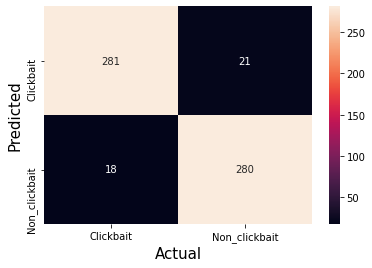

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred_tfidf,y_test)
axes=sns.heatmap(cm, annot=True, fmt='d')
class_labels=['Clickbait','Non_clickbait']
axes.set_yticklabels(class_labels)
axes.set_xticklabels(class_labels)
axes.set_xlabel('Actual',fontsize=15)
axes.set_ylabel('Predicted',fontsize=15)
fig = axes.get_figure()
#fig.savefig("CM_only_text_LR.png", dpi=300, bbox_inches='tight')

SVM

In [ ]:
from sklearn import svm
svm_tfidf=svm.SVC()
svm_tfidf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred_svm=svm_tfidf.predict(X_test)
from sklearn.metrics import classification_report
svm_tfidf=classification_report(pred_svm,y_test)
print(svm_tfidf)

               precision    recall  f1-score   support

    clickbait       0.98      0.93      0.96       315
non-clickbait       0.93      0.98      0.96       285

     accuracy                           0.96       600
    macro avg       0.96      0.96      0.96       600
 weighted avg       0.96      0.96      0.96       600



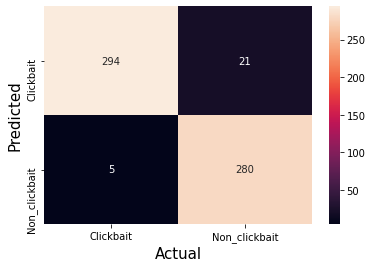

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred_svm,y_test)
axes=sns.heatmap(cm, annot=True, fmt='d')
class_labels=['Clickbait','Non_clickbait']
axes.set_yticklabels(class_labels)
axes.set_xticklabels(class_labels)
axes.set_xlabel('Actual',fontsize=15)
axes.set_ylabel('Predicted',fontsize=15)
fig = axes.get_figure()
#fig.savefig("CM_only_text_LR.png", dpi=300, bbox_inches='tight')

Decision Tree

In [ ]:
from sklearn import tree
tree_tfidf = tree.DecisionTreeClassifier()
tree_tfidf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_pred=tree_tfidf.predict(X_test)
from sklearn.metrics import classification_report
tree_cr=classification_report(tree_pred,y_test)
print(tree_cr)

               precision    recall  f1-score   support

    clickbait       0.89      0.93      0.91       284
non-clickbait       0.94      0.89      0.91       316

     accuracy                           0.91       600
    macro avg       0.91      0.91      0.91       600
 weighted avg       0.91      0.91      0.91       600



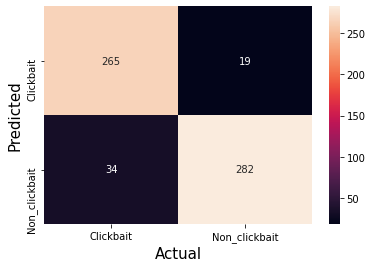

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(tree_pred,y_test)
axes=sns.heatmap(cm, annot=True, fmt='d')
class_labels=['Clickbait','Non_clickbait']
axes.set_yticklabels(class_labels)
axes.set_xticklabels(class_labels)
axes.set_xlabel('Actual',fontsize=15)
axes.set_ylabel('Predicted',fontsize=15)
fig = axes.get_figure()
#fig.savefig("CM_only_text_LR.png", dpi=300, bbox_inches='tight')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB_tfidf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

In [ ]:
GB_pred=GB_tfidf.predict(X_test)
from sklearn.metrics import classification_report
GB_cr=classification_report(GB_pred,y_test)
print(GB_cr)

               precision    recall  f1-score   support

    clickbait       0.97      0.85      0.91       340
non-clickbait       0.83      0.97      0.89       260

     accuracy                           0.90       600
    macro avg       0.90      0.91      0.90       600
 weighted avg       0.91      0.90      0.90       600



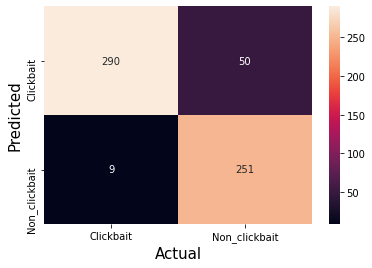

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(GB_pred,y_test)
axes=sns.heatmap(cm, annot=True, fmt='d')
class_labels=['Clickbait','Non_clickbait']
axes.set_yticklabels(class_labels)
axes.set_xticklabels(class_labels)
axes.set_xlabel('Actual',fontsize=15)
axes.set_ylabel('Predicted',fontsize=15)
fig = axes.get_figure()
#fig.savefig("CM_only_text_LR.png", dpi=300, bbox_inches='tight')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_tfidf = KNeighborsClassifier(n_neighbors=3)
knn_tfidf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn_pred=knn_tfidf.predict(X_test)
from sklearn.metrics import classification_report
knn_cr=classification_report(knn_pred,y_test)
print(knn_cr)

               precision    recall  f1-score   support

    clickbait       0.91      0.75      0.82       360
non-clickbait       0.70      0.88      0.78       240

     accuracy                           0.81       600
    macro avg       0.81      0.82      0.80       600
 weighted avg       0.83      0.81      0.81       600



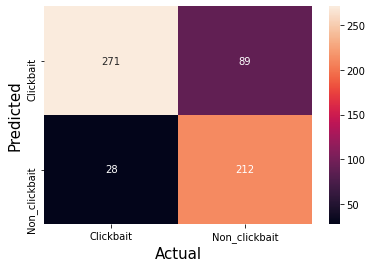

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(knn_pred,y_test)
axes=sns.heatmap(cm, annot=True, fmt='d')
class_labels=['Clickbait','Non_clickbait']
axes.set_yticklabels(class_labels)
axes.set_xticklabels(class_labels)
axes.set_xlabel('Actual',fontsize=15)
axes.set_ylabel('Predicted',fontsize=15)
fig = axes.get_figure()
#fig.savefig("CM_only_text_LR.png", dpi=300, bbox_inches='tight')

# ALL FEATURES

In [ ]:
scaled_df=np.array(scaled_df)
scaled_df = pd.DataFrame(scaled_df, columns = ['like','dislike','VL','VD','LD'])
scaled_df

,like,dislike,VL,VD,LD
0,0.000348,0.000026,0.000046,1.989312e-04,0.007692
1,0.000229,0.000015,0.000146,6.308831e-04,0.007692
2,0.000290,0.000021,0.000044,1.900400e-04,0.007692
3,0.000237,0.000016,0.000058,2.515118e-04,0.007692
4,0.000997,0.000085,0.000020,8.806202e-05,0.007692
...,...,...,...,...,...
2994,0.000411,0.001564,0.000058,5.260526e-06,0.000163
2995,0.000542,0.001411,0.000145,1.612640e-05,0.000198
2996,0.000369,0.000606,0.000003,3.389509e-07,0.000236
2997,0.000122,0.001646,0.000787,4.904857e-05,0.000111


In [ ]:
X_tfidf_array=X_tfidf.toarray()

In [ ]:
X_tfidf_df = pd.DataFrame(X_tfidf_array).add_prefix('col_')
X_tfidf_df


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,...,col_2758,col_2759,col_2760,col_2761,col_2762,col_2763,col_2764,col_2765,col_2766,col_2767,col_2768,col_2769,col_2770,col_2771,col_2772,col_2773,col_2774,col_2775,col_2776,col_2777,col_2778,col_2779,col_2780,col_2781,col_2782,col_2783,col_2784,col_2785,col_2786,col_2787,col_2788,col_2789,col_2790,col_2791,col_2792,col_2793,col_2794,col_2795,col_2796,col_2797
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_all=pd.concat([X_tfidf_df, scaled_df, df_final['target']], axis=1)
df_all

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,...,col_2764,col_2765,col_2766,col_2767,col_2768,col_2769,col_2770,col_2771,col_2772,col_2773,col_2774,col_2775,col_2776,col_2777,col_2778,col_2779,col_2780,col_2781,col_2782,col_2783,col_2784,col_2785,col_2786,col_2787,col_2788,col_2789,col_2790,col_2791,col_2792,col_2793,col_2794,col_2795,col_2796,col_2797,like,dislike,VL,VD,LD,target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000348,0.000026,0.000046,1.989312e-04,0.007692,non-clickbait
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000229,0.000015,0.000146,6.308831e-04,0.007692,non-clickbait
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.000290,0.000021,0.000044,1.900400e-04,0.007692,non-clickbait
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000237,0.000016,0.000058,2.515118e-04,0.007692,non-clickbait
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000997,0.000085,0.000020,8.806202e-05,0.007692,non-clickbait
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000411,0.001564,0.000058,5.260526e-06,0.000163,clickbait
2995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000542,0.001411,0.000145,1.612640e-05,0.000198,clickbait
2996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0.000369,0.000606,0.000003,3.389509e-07,0.000236,clickbait
2997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000122,0.001646,0.000787,4.904857e-05,0.000111,clickbait


In [ ]:
X=df_all.drop(['target'], axis=1)
y=df_all['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_tfidf=LogisticRegression()
LR_tfidf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_tfidf=LR_tfidf.predict(X_test)
from sklearn.metrics import classification_report
cr_tfidf=classification_report(pred_tfidf,y_test)
print(cr_tfidf)

               precision    recall  f1-score   support

    clickbait       0.96      0.94      0.95       305
non-clickbait       0.94      0.96      0.95       295

     accuracy                           0.95       600
    macro avg       0.95      0.95      0.95       600
 weighted avg       0.95      0.95      0.95       600



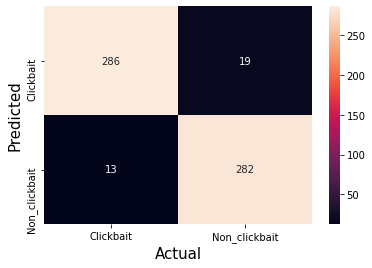

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred_tfidf,y_test)
axes=sns.heatmap(cm, annot=True, fmt='d')
class_labels=['Clickbait','Non_clickbait']
axes.set_yticklabels(class_labels)
axes.set_xticklabels(class_labels)
axes.set_xlabel('Actual',fontsize=15)
axes.set_ylabel('Predicted',fontsize=15)
fig = axes.get_figure()
#fig.savefig("CM_only_text_LR.png", dpi=300, bbox_inches='tight')

SVM

In [ ]:
from sklearn import svm
svm_tfidf=svm.SVC()
svm_tfidf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred_svm=svm_tfidf.predict(X_test)
from sklearn.metrics import classification_report
svm_tfidf=classification_report(pred_svm,y_test)
print(svm_tfidf)

               precision    recall  f1-score   support

    clickbait       0.98      0.94      0.96       314
non-clickbait       0.93      0.98      0.96       286

     accuracy                           0.96       600
    macro avg       0.96      0.96      0.96       600
 weighted avg       0.96      0.96      0.96       600



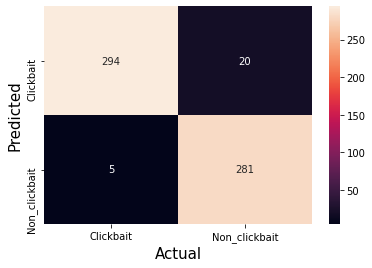

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred_svm,y_test)
axes=sns.heatmap(cm, annot=True, fmt='d')
class_labels=['Clickbait','Non_clickbait']
axes.set_yticklabels(class_labels)
axes.set_xticklabels(class_labels)
axes.set_xlabel('Actual',fontsize=15)
axes.set_ylabel('Predicted',fontsize=15)
fig = axes.get_figure()
#fig.savefig("CM_only_text_LR.png", dpi=300, bbox_inches='tight')

Decission tree

In [ ]:
from sklearn import tree
tree_tfidf = tree.DecisionTreeClassifier()
tree_tfidf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_pred=tree_tfidf.predict(X_test)
from sklearn.metrics import classification_report
tree_cr=classification_report(tree_pred,y_test)
print(tree_cr)

               precision    recall  f1-score   support

    clickbait       0.99      0.98      0.98       300
non-clickbait       0.98      0.99      0.99       300

     accuracy                           0.98       600
    macro avg       0.99      0.98      0.98       600
 weighted avg       0.99      0.98      0.98       600



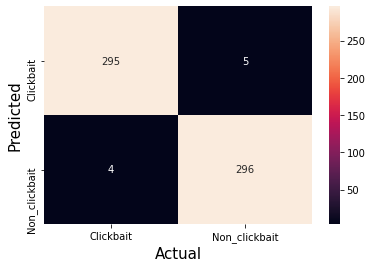

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(tree_pred,y_test)
axes=sns.heatmap(cm, annot=True, fmt='d')
class_labels=['Clickbait','Non_clickbait']
axes.set_yticklabels(class_labels)
axes.set_xticklabels(class_labels)
axes.set_xlabel('Actual',fontsize=15)
axes.set_ylabel('Predicted',fontsize=15)
fig = axes.get_figure()
#fig.savefig("CM_only_text_LR.png", dpi=300, bbox_inches='tight')

Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB_tfidf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

In [ ]:
GB_pred=GB_tfidf.predict(X_test)
from sklearn.metrics import classification_report
GB_cr=classification_report(GB_pred,y_test)
print(GB_cr)

               precision    recall  f1-score   support

    clickbait       0.99      0.99      0.99       299
non-clickbait       0.99      0.99      0.99       301

     accuracy                           0.99       600
    macro avg       0.99      0.99      0.99       600
 weighted avg       0.99      0.99      0.99       600



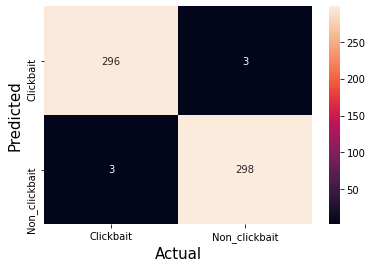

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(GB_pred,y_test)
axes=sns.heatmap(cm, annot=True, fmt='d')
class_labels=['Clickbait','Non_clickbait']
axes.set_yticklabels(class_labels)
axes.set_xticklabels(class_labels)
axes.set_xlabel('Actual',fontsize=15)
axes.set_ylabel('Predicted',fontsize=15)
fig = axes.get_figure()
#fig.savefig("CM_only_text_LR.png", dpi=300, bbox_inches='tight')

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_tfidf = KNeighborsClassifier(n_neighbors=3)
knn_tfidf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn_pred=knn_tfidf.predict(X_test)
from sklearn.metrics import classification_report
knn_cr=classification_report(knn_pred,y_test)
print(knn_cr)

               precision    recall  f1-score   support

    clickbait       0.92      0.78      0.85       352
non-clickbait       0.75      0.91      0.82       248

     accuracy                           0.83       600
    macro avg       0.84      0.85      0.83       600
 weighted avg       0.85      0.83      0.84       600



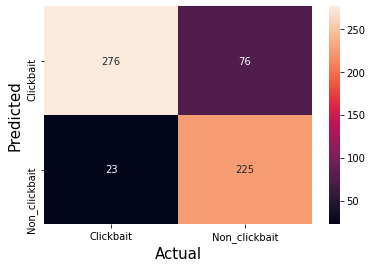

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(knn_pred,y_test)
axes=sns.heatmap(cm, annot=True, fmt='d')
class_labels=['Clickbait','Non_clickbait']
axes.set_yticklabels(class_labels)
axes.set_xticklabels(class_labels)
axes.set_xlabel('Actual',fontsize=15)
axes.set_ylabel('Predicted',fontsize=15)
fig = axes.get_figure()
#fig.savefig("CM_only_text_LR.png", dpi=300, bbox_inches='tight')